In [ ]:
# Data Analytics III
#     1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv
#     dataset.
#     2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate,
#     Precision,Recall on the given dataset.

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.read_csv('datasets/Iris.csv')

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [34]:
x = df.drop(['Species'], axis=1)
y = df['Species']
print(x)
print(y)
print(x.shape)
print(y.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virgin

In [48]:
# Train Naïve Bayes model
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


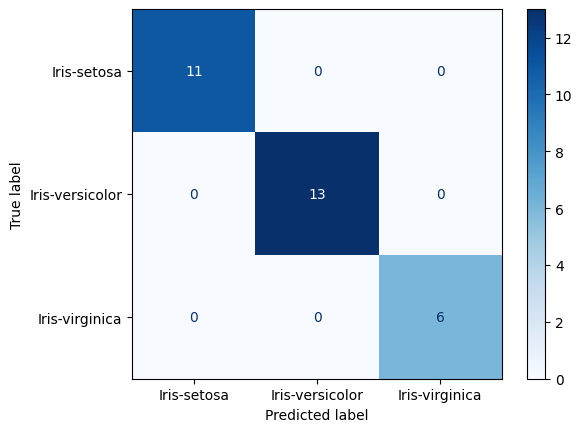

In [45]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
conf_matrix.plot(cmap='Blues')
plt.show()

In [46]:
# Accuracy, Precision, Recall, Error Rate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
error_rate = 1 - accuracy

print("\nAccuracy:", round(accuracy, 4))
print("Error Rate:", round(error_rate, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))


Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0


In [52]:
tp, fn, fp, tn = confusion_matrix(y_test == "Iris-setosa", y_pred == "Iris-setosa").ravel()
print("\nTrue Positives (TP):", tp)
print("False Negatives (FN):", fn)
print("False Positives (FP):", fp)
print("True Negatives (TN):", tn)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=model.classes_))
print("\nF1 Score:", round(f1_score(y_test, y_pred, average='macro'), 4))


True Positives (TP): 19
False Negatives (FN): 0
False Positives (FP): 0
True Negatives (TN): 11

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


F1 Score: 1.0
